In [155]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [156]:
#import datasets
file_path = '/Users/diya/Python Projects/Walmart/Walmart_sales.csv'
data = pd.read_csv(file_path)

In [157]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [159]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [160]:
data.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [161]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Filter the data for a specific range of dates
start_date = '2010-02-05'
end_date = '2010-03-05'
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
filtered_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6292,45,2010-02-05,890689.51,0,27.31,2.784,181.871190,8.992
6293,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992
6294,45,2010-02-19,841264.04,0,31.27,2.745,182.034782,8.992
6295,45,2010-02-26,741891.65,0,34.89,2.754,182.077469,8.992


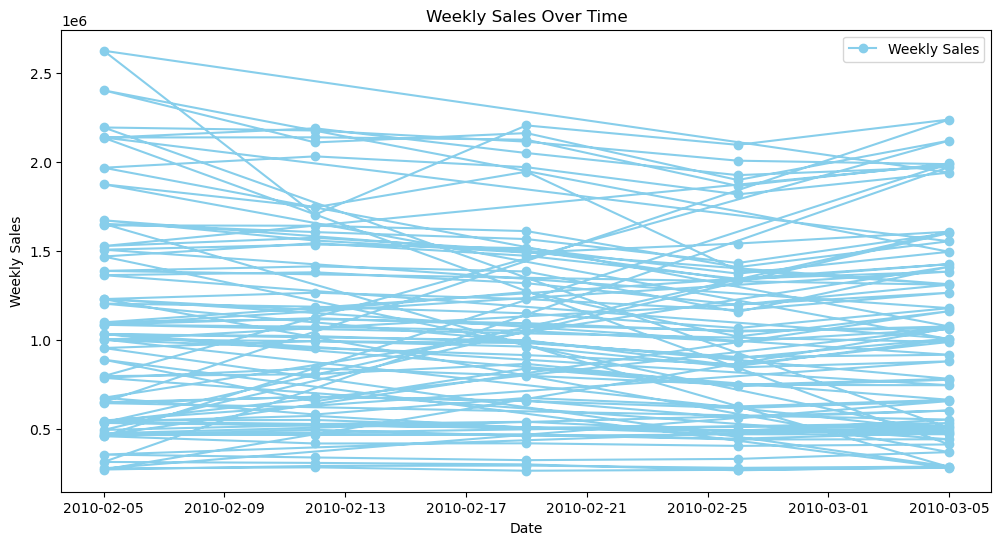

In [162]:
# Plotting the trend of weekly sales over time to observe any seasonality or trends.
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Weekly_Sales'], label='Weekly Sales', color='skyblue', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.legend()
plt.show()

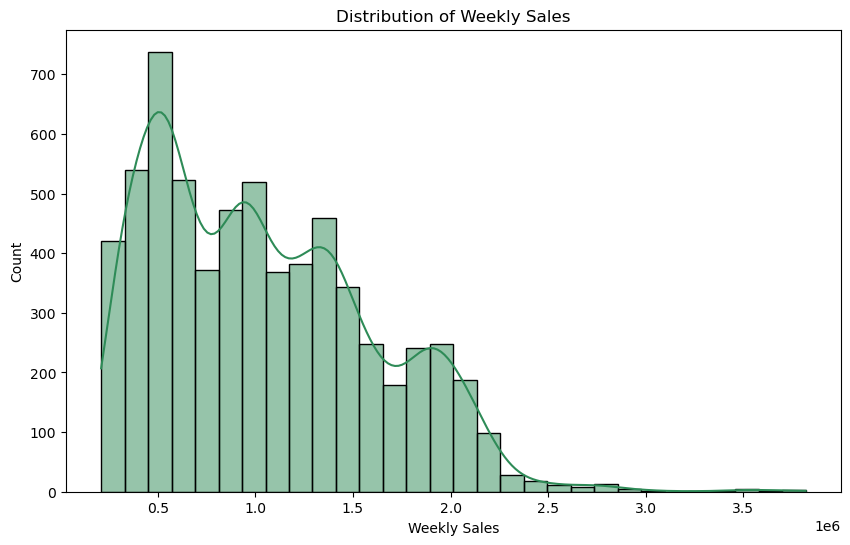

In [184]:
# Distribution of Weekly Sales
# Using a histogram to visualize the distribution of weekly sales.
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], color='seagreen', bins=30, kde=True)
plt.xlabel('Weekly Sales')
plt.title('Distribution of Weekly Sales')
plt.show()

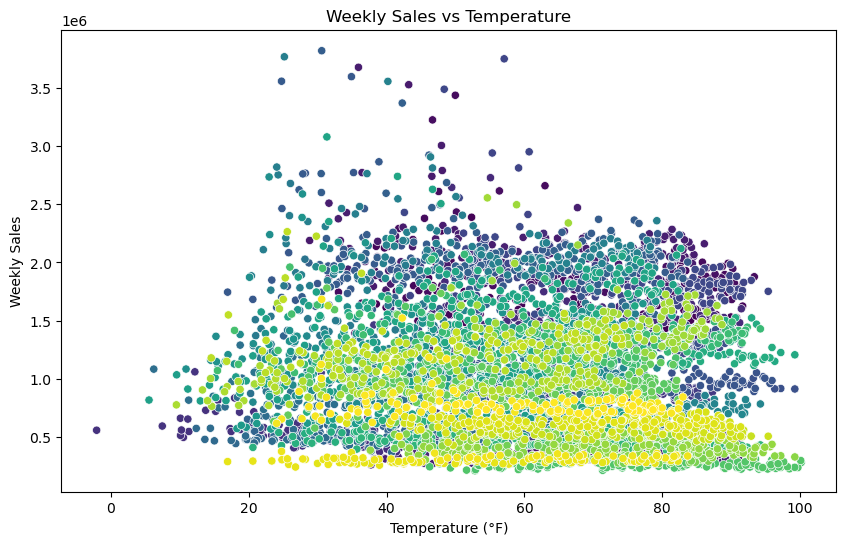

In [164]:
# Create a unique identifier for each row to color each point differently
data['Unique_ID'] = data.index

# Plot the data with each point having a different color
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, hue='Unique_ID', palette='viridis', legend=False)
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature')
plt.show()

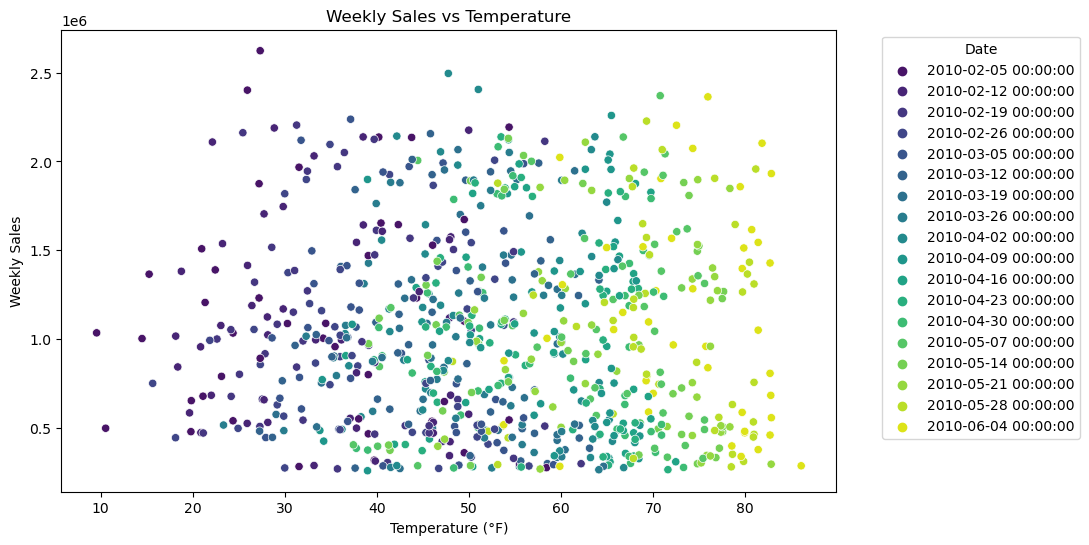

In [165]:
# Filter the data for a specific range of dates
start_date = '2010-02-05'
end_date = '2010-06-05'
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Create a scatter plot with different colors for each data point based on the Date
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Date', palette='viridis', data=filtered_data)
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

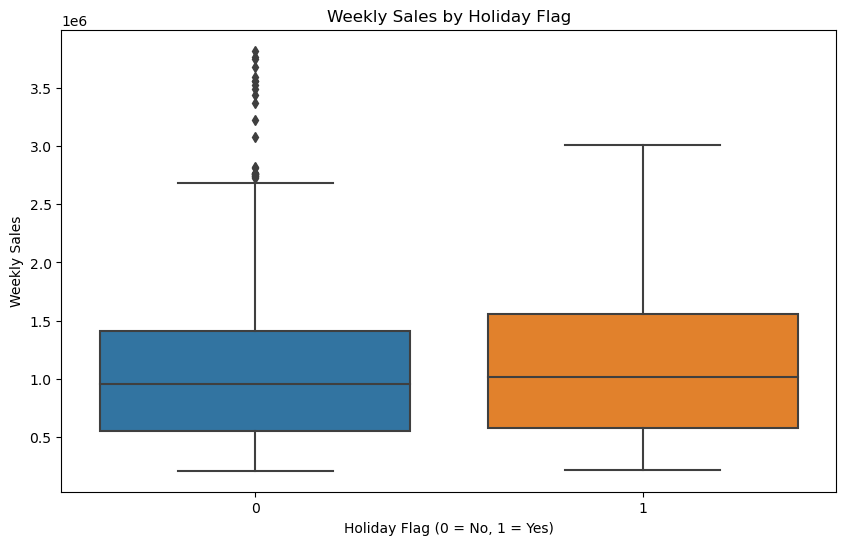

In [166]:
# Weekly sale by hoilday
# Comparing the sales on holidays vs non-holidays using box plots.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.xlabel('Holiday Flag (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Holiday Flag')
plt.show()

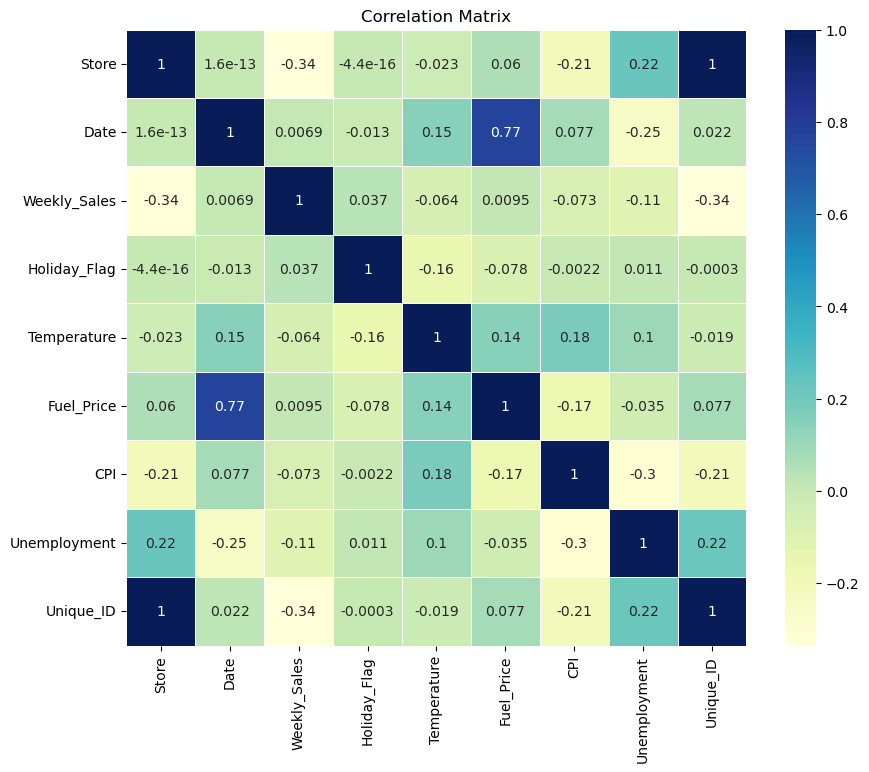

In [167]:
# Correlation Matrix
# Calculating and visualizing the correlation matrix to understand the relationships between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

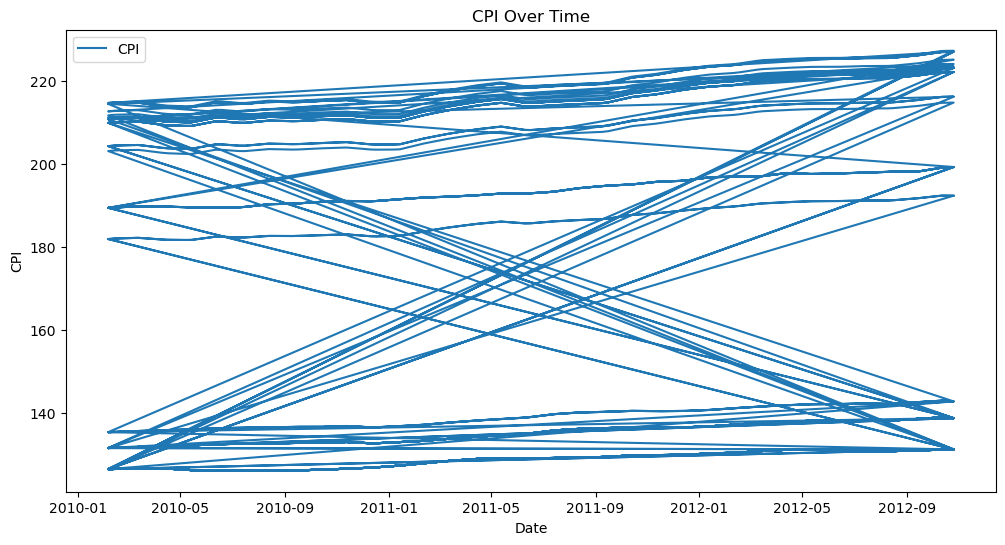

In [168]:
# Visualize the Trend of CPI Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['CPI'], label='CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI Over Time')
plt.legend()
plt.show()

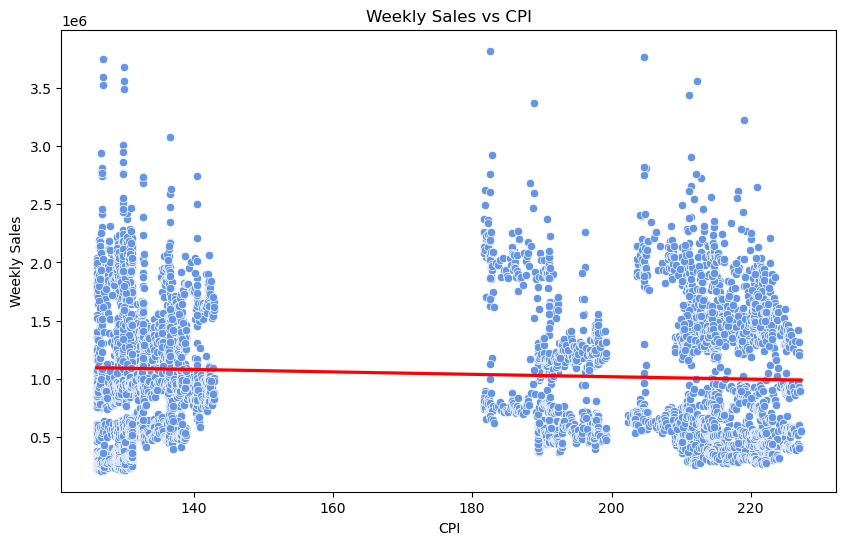

In [185]:
# Relationship Between CPI and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, color='cornflowerblue')
sns.regplot(x='CPI', y='Weekly_Sales', data=data, scatter=False, color='red')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs CPI')
plt.show()

In [170]:
# Compute Correlation Between CPI and Weekly Sales
cpi_sales_correlation = data['CPI'].corr(data['Weekly_Sales'])
cpi_sales_correlation

-0.07263416204017624

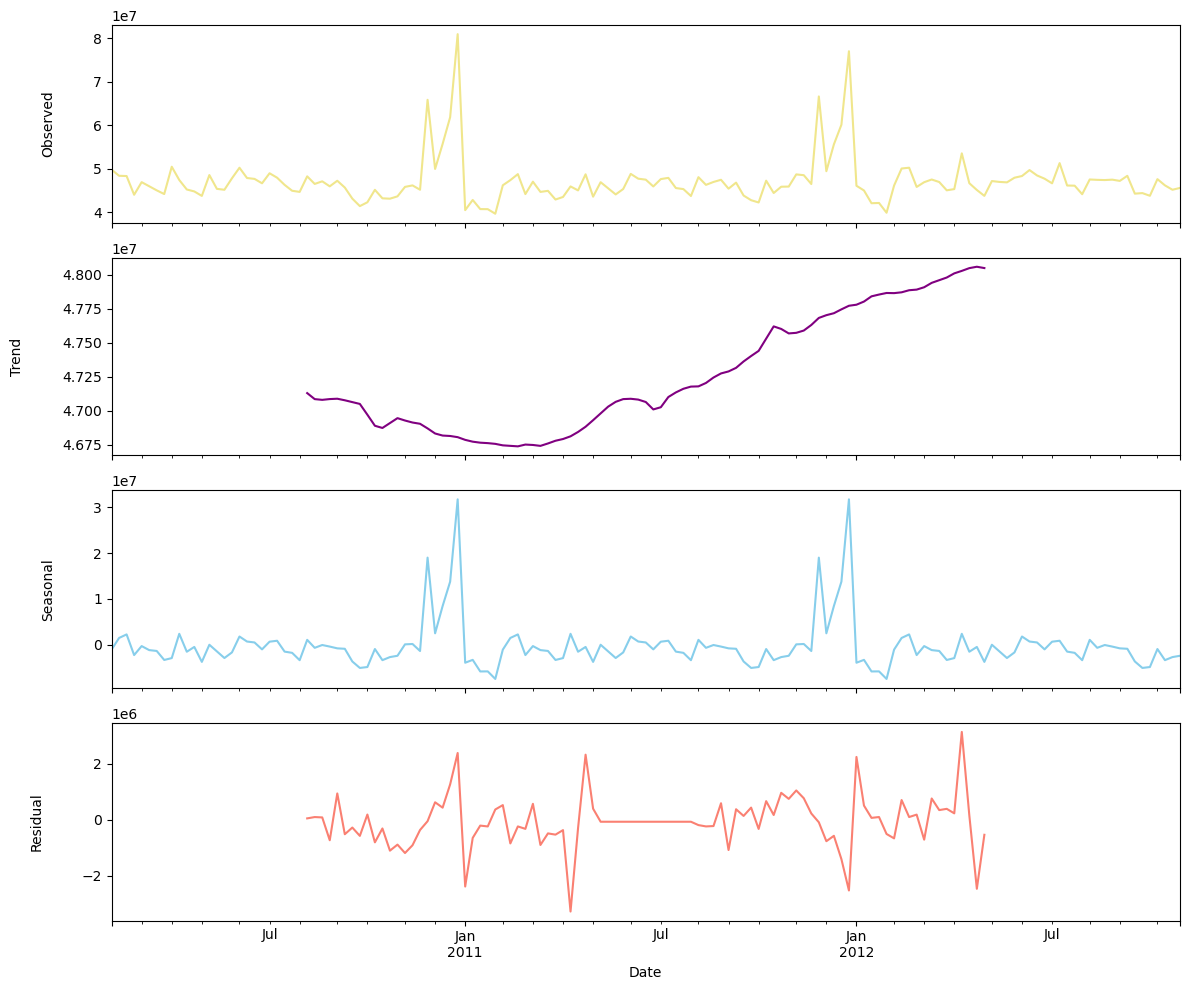

In [171]:
# Set the date column as the index
data.set_index('Date', inplace=True)

# Resample the data to weekly frequency and sum the weekly sales
weekly_sales = data['Weekly_Sales'].resample('W').sum()

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(weekly_sales, model='additive')

# Plot the seasonal decomposition with adjusted spacing for y-axis labels
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=ax1, color='khaki')
ax1.set_ylabel('Observed\n\n')
decomposition.trend.plot(ax=ax2, color='purple')
ax2.set_ylabel('Trend\n\n')
decomposition.seasonal.plot(ax=ax3, color='skyblue')
ax3.set_ylabel('Seasonal\n\n')
decomposition.resid.plot(ax=ax4, color='salmon')
ax4.set_ylabel('Residual\n\n')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [172]:
# Prepare the dataset for regression
data.reset_index(inplace=True)
X = data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Build the regression model
model = sm.OLS(y, X).fit()
regression_summary = model.summary()
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 24 May 2024   Prob (F-statistic):           5.93e-34
Time:                        18:30:33   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.727e+06   7.98e+04     21.646      0.000    1.57e+06    1.88e+06
Holiday_Flag  7.489e+04   2.76e+04      2.710      0.007    2.07e+04    1.29e+05
Temperature   -724.1715    400.461     -1.808      0.071   -1509.207      60.864
Fuel_Price   -1.017e+04   1.58e+04     -0.645      0.519   -4.11e+04    2.07e+04
CPI          -1598.8717    195.127     -8.194      0.000   -1981.385   -1216.358
Unemployment -4.155e+04   3972.660    -10.460      0.000   -4.93e+04   -3.38e+04
==============================================================================
Omnibus:                      365.109   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.212
Skew:                           0.633   Prob(JB):                     3.81e-94
Kurtosis:                       3.007   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
# Compute key statistics for each store
store_stats = data.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'sum', 'std']
}).reset_index()

# Rename columns for clarity
store_stats.columns = ['Store', 'Avg_Weekly_Sales', 'Total_Sales', 'Sales_StdDev']

store_stats

,Store,Avg_Weekly_Sales,Total_Sales,Sales_StdDev
0,1,1.555264e+06,2.224028e+08,155980.767761
1,2,1.925751e+06,2.753824e+08,237683.694682
2,3,4.027044e+05,5.758674e+07,46319.631557
3,4,2.094713e+06,2.995440e+08,266201.442297
4,5,3.180118e+05,4.547569e+07,37737.965745
5,6,1.564728e+06,2.237561e+08,212525.855862
6,7,5.706173e+05,8.159828e+07,112585.469220
7,8,9.087495e+05,1.299512e+08,106280.829881
8,9,5.439806e+05,7.778922e+07,69028.666585
9,10,1.899425e+06,2.716177e+08,302262.062504


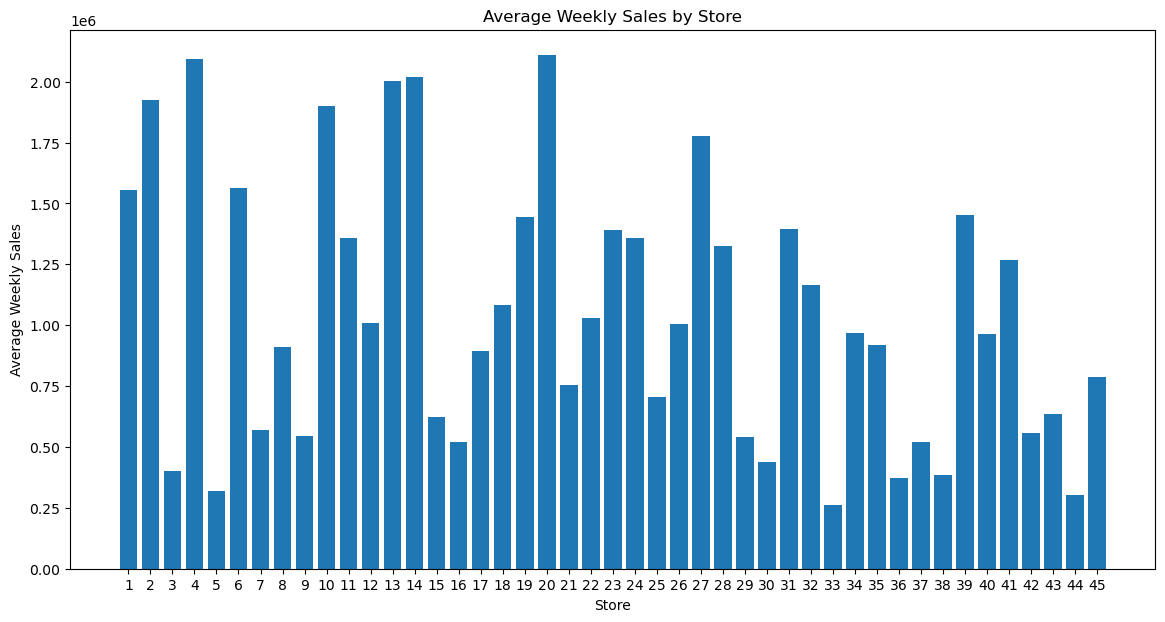

In [174]:
# Plot average weekly sales for each store
plt.figure(figsize=(14, 7))
plt.bar(store_stats['Store'], store_stats['Avg_Weekly_Sales'])
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.xticks(store_stats['Store'])
plt.show()

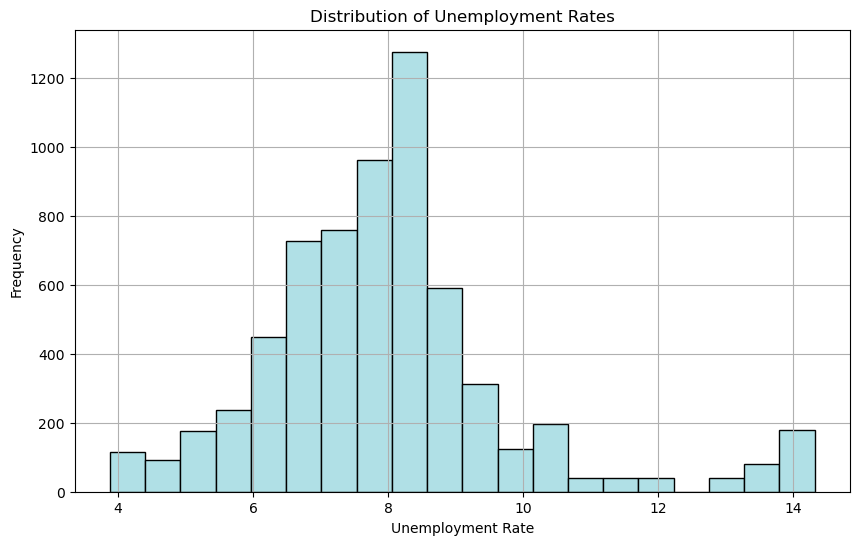

In [187]:
# Distribution of Unemployment
plt.figure(figsize=(10, 6))
plt.hist(data['Unemployment'], bins=20, color='powderblue', edgecolor='black')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

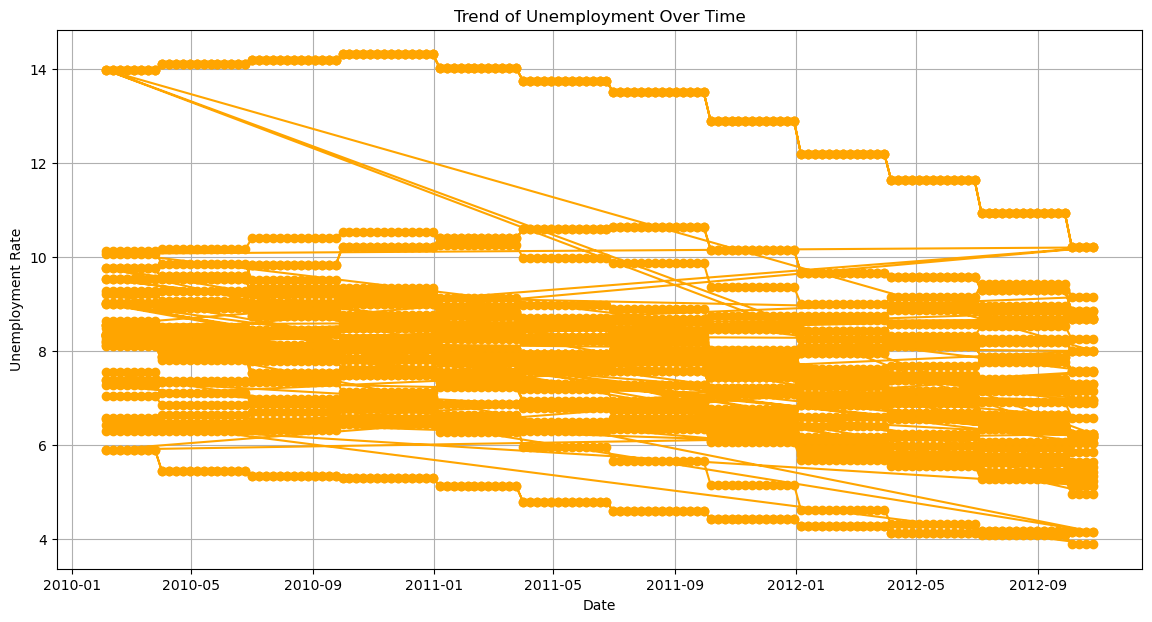

In [189]:
# Trend of Unemployment Over Time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Unemployment'], color='orange', marker='o', linestyle='-')
plt.title('Trend of Unemployment Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

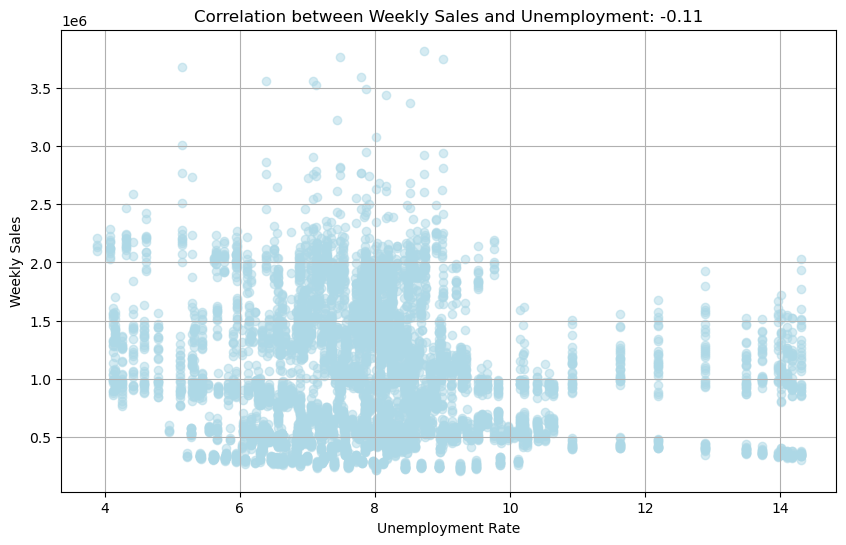

Correlation coefficient between Weekly Sales and Unemployment: -0.11


In [191]:
# Compute the correlation between Weekly Sales and Unemployment
correlation = data[['Weekly_Sales', 'Unemployment']].corr().iloc[0, 1]

# Create a scatter plot of Weekly Sales vs Unemployment with blue color for all data points
plt.figure(figsize=(10, 6))
plt.scatter(data['Unemployment'], data['Weekly_Sales'], color='lightblue', alpha=0.5)
plt.title(f'Correlation between Weekly Sales and Unemployment: {correlation:.2f}')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

print(f"Correlation coefficient between Weekly Sales and Unemployment: {correlation:.2f}")